In [ ]:
# https://python-graph-gallery.com/322-network-layout-possibilities/

In [102]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def graph_royalty(path, columnA, columnB, sheet):
    data = pd.read_excel(path, sheet_name=sheet)
    
    # get the unique values from the dataframe
    uniqueA_array = (data[columnA]).unique()
    uniqueB_array = (data[columnB]).unique()
    unique_list = uniqueA_array.tolist()+uniqueB_array.tolist()

    # make a list with all the pairs
    pair_list= []
    for i in range(len(data)):
        pair_list.append((data.iloc[i][0],data.iloc[i][1]))

    # make a list with all the weighted pairs
    weight_list= []
    for i in range(len(data)):
        weight_list.append((data.iloc[i][0],data.iloc[i][1],data.iloc[i][2]))
        
    # create an instance of a graph
    G = nx.Graph()

    # add nodes and edges from lists
    G.add_nodes_from(unique_list)
    
    # add weights
    for i in weight_list:
        G.add_edge(i[0],i[1], weight=i[2])
        
    # use one of the edge properties to control line thickness
    edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
    edgewidth_norm= [(float(i)/sum(edgewidth))*500 for i in edgewidth]
    edgewidth_clr= [(float(i)/sum(edgewidth)) for i in edgewidth]

    # layout
    pos = nx.circular_layout(G)
    #pos = nx.spring_layout(G)

    # rendering
    plt.figure(figsize=(20,20))
    plt.subplot()
    plt.axis('off')
    nx.draw_networkx_nodes(G, pos,node_size=1500)
    nx.draw_networkx_edges(G, pos, width=edgewidth_norm,nodecolor='r',edge_color=edgewidth_clr,edge_cmap=plt.cm.winter)

    # add labels from the unique_list
    labels = {}
    for i in unique_list:
        labels[i] = i
    nx.draw_networkx_labels(G,pos, labels,font_size=16)
    
    plt.title("Three Data")

    plt.show()
    
    

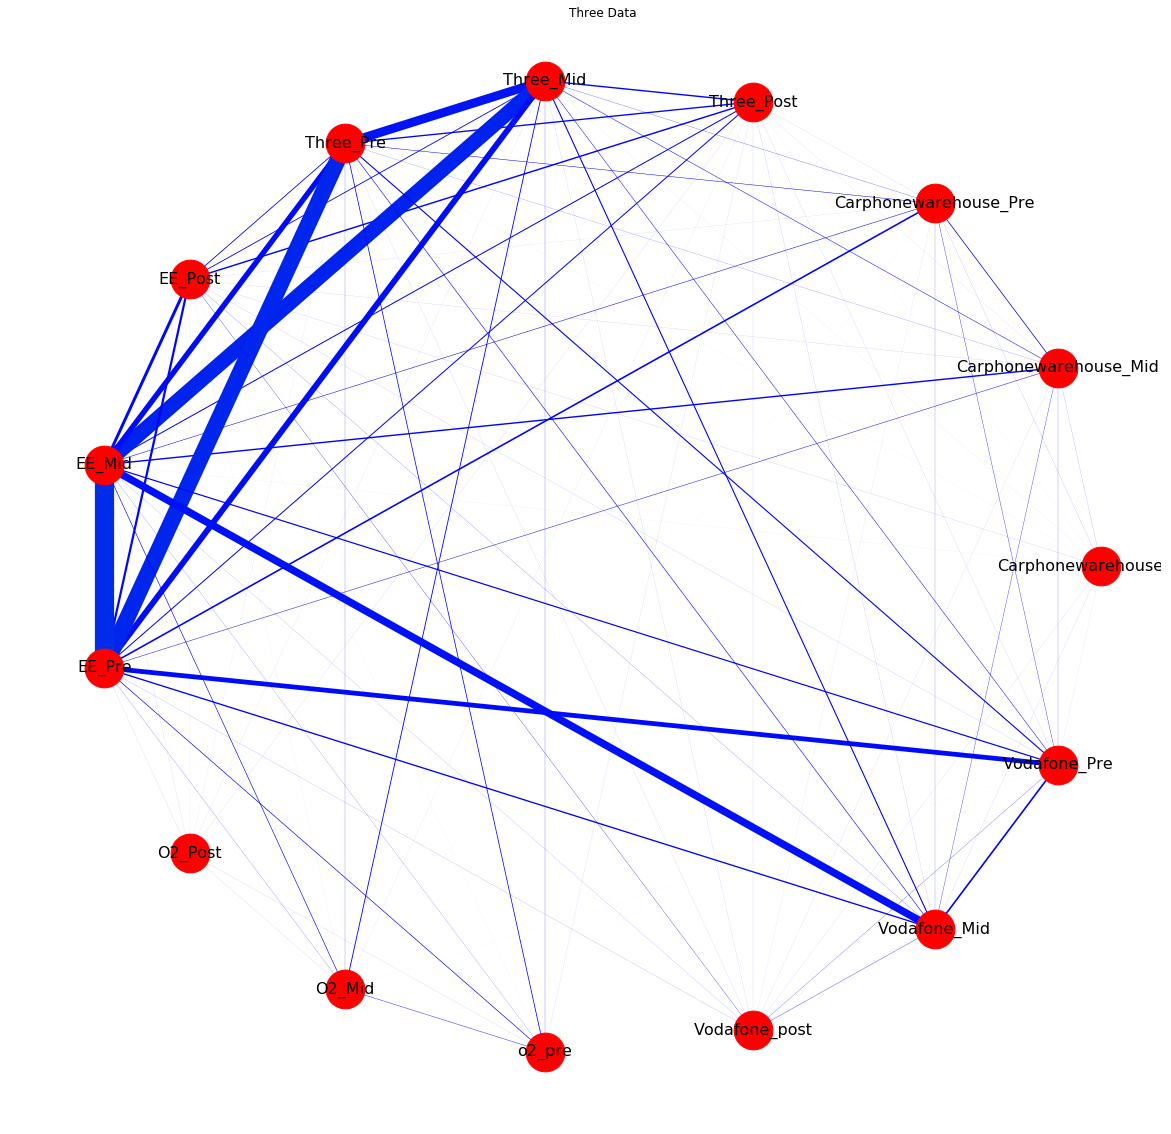

In [103]:
graph_royalty(r"C:\Users\Lefteris\Desktop\Potential\Three\data for Three.xlsx",'Store A', 'Store B','Sheet1' )

In [8]:
# read the Levis data pair and nodes
import pandas as pd
levis_data = pd.read_excel(r"C:\Users\Lefteris\Desktop\Potential\Levis\Levis_Trends_People_2.xlsx")

levis_data.head()

Store A                 Store B  Device ID Counter
0  Carphonewarehouse_Post  Carphonewarehouse_Post                732
1   Carphonewarehouse_Mid  Carphonewarehouse_Post                134
2   Carphonewarehouse_Mid   Carphonewarehouse_Mid               6681
3   Carphonewarehouse_Pre  Carphonewarehouse_Post                123
4   Carphonewarehouse_Pre   Carphonewarehouse_Mid                944

In [11]:
# get the unique values from the dataframe
unique_array = (levis_data["Retargeting Function ID"]).unique()
unique_list = unique_array.tolist()

# make a list with all the pairs
pair_list= []
for i in range(len(levis_data)):
    pair_list.append((levis_data.iloc[i][0],levis_data.iloc[i][1]))
    
# make a list with all the weighted pairs
weight_list= []
for i in range(len(levis_data)):
    weight_list.append((levis_data.iloc[i][0],levis_data.iloc[i][1],levis_data.iloc[i][2]))

In [236]:
# create an instance of a graph
G = nx.Graph()

# add nodes and edges from lists
G.add_nodes_from(unique_list)

In [269]:
# add weights
for i in weight_list:
    G.add_edge(i[0],i[1], weight=i[2])

In [270]:
unique_list

['Diesel London',
 'Diesel Non-London',
 'Levis London',
 'Levis Non-London',
 'Primark London',
 'Primark Non-London',
 'Topshop London',
 'Topshop Non-London',
 'Zara London',
 'Zara Non-London']

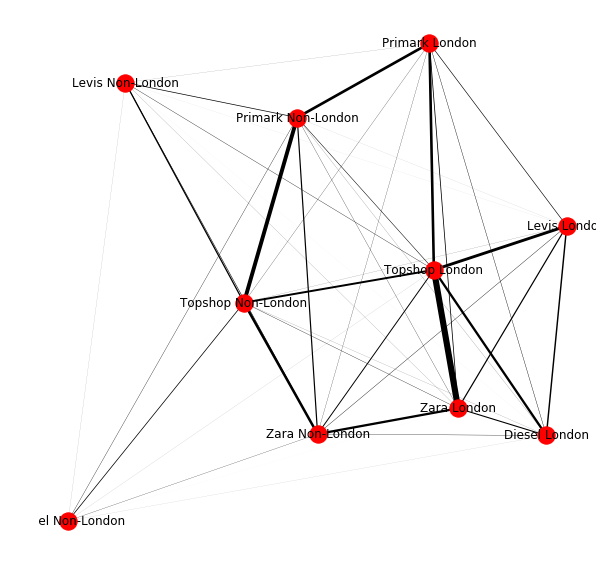

In [282]:
# use one of the edge properties to control line thickness
edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
edgewidth_norm= [(float(i)/sum(edgewidth))*500 for i in edgewidth]

# layout
pos = nx.spring_layout(G, iterations=50)
#pos = nx.random_layout(G)

# rendering
plt.figure(figsize=(10,10))
plt.subplot(); plt.axis('off')
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, width=edgewidth_norm)

# add labels from the unique_list
labels = {}
for i in unique_list:
    labels[i] = i
nx.draw_networkx_labels(G,pos, labels)

plt.show()

In [105]:
# stats about nodes and edges
print("number of nodes: {}".format(G.number_of_nodes()))
print("number of edges: {}".format(G.number_of_edges()))

number of nodes: 10
number of edges: 55


In [335]:
import plotly.plotly as py
import plotly.graph_objs as go

%pylab inline

# https://plot.ly/~empet/14683/networks-with-plotly/#/

Populating the interactive namespace from numpy and matplotlib
